In [20]:
import warnings
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout
from tensorflow.keras.regularizers import l1, l2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [21]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PotatoDataset",
    image_size=(256, 256),
    shuffle=True,
    verbose=True
)

Found 2152 files belonging to 3 classes.


In [22]:
dataset.class_names
classes = ["Potato___Early_blight", "Potato___Late_blight", "Potato___healthy"]

Resize images

In [23]:
# Function to normalize images
def normalize_image(image, label):
    image = tf.cast(image, tf.float32) / 255.0  # Divide by 255 to normalize
    return image, label

dataset = dataset.map(normalize_image)

Image batch shape: (32, 256, 256, 3)
Label batch shape: (32,)
value-- tf.Tensor([0 1 0 1 0 1 0 0 0 1 2 1 1 0 0 1 0 2 0 1 0 2 1 0 1 0 0 0 0 0 0 1], shape=(32,), dtype=int32)


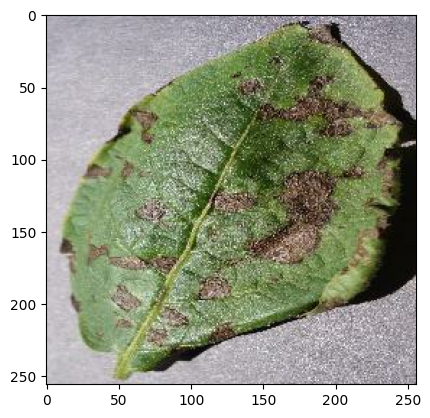

In [24]:
for img,j in dataset.take(1):
    print("Image batch shape:", img.shape)  # Should be (batch_size, height, width, channels)
    print("Label batch shape:", j.shape)
    print("value--", j)
    for k in range(1):
        plt.imshow(img[k].numpy())
    

Split dataset

In [25]:
len(dataset)

68

In [26]:
dataset = dataset.shuffle(1000)
train_data = dataset.take(int(len(dataset)*0.8))
print("Lenght of train dataset is-",len(train_data))

Lenght of train dataset is- 54


In [27]:
remaining_data = dataset.skip(int(len(dataset)*0.8))

test_data = remaining_data.take(int(len(remaining_data)*0.5))
validation_data = remaining_data.skip(int(len(remaining_data)*0.5))

print("Lenght of test dataset is-",len(test_data))
print("Lenght of validation dataset is-",len(validation_data))

Lenght of test dataset is- 7
Lenght of validation dataset is- 7


### By U-Tube videos

In [28]:
# train_data = train_data.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE).map(normalize_image)
# test_data = test_data.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE).map(normalize_image)
# validation_data = validation_data.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE).map(normalize_image)

In [29]:
resize_and_rescaling = Sequential([
    tf.keras.layers.Resizing(255,255),
    tf.keras.layers.Rescaling(1.0/255),
])

In [30]:
data_aug = Sequential([
    tf.keras.layers.RandomFlip('horizontal_and_vertical'),
    tf.keras.layers.RandomRotation(0.2),
])

In [31]:
model = Sequential([
    resize_and_rescaling,
    data_aug,

    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 256, 256, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Flattening for fully connected layers
    Flatten(),

    # Dense(128, activation='relu', kernel_regularizer='l1'),
    # Dropout(0.5),
    Dense(3, activation='softmax')
])

model.build(input_shape= (32, 256, 256, 3))

In [32]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)       │ (32, 255, 255, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_4 (Sequential)       │ (32, 255, 255, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (32, 253, 253, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (32, 126, 126, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (32, 124, 124, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (32, 12544)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 3)                │        37,635 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 130,883 (511.26 KB)

 Trainable params: 130,883 (511.26 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [34]:
history = model.fit(
    train_data,
    validation_data=validation_data,
    batch_size = 32,
    verbose = 1,
    epochs=50
)


Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 48s 818ms/step - accuracy: 0.4549 - loss: 0.9757 - val_accuracy: 0.4850 - val_loss: 0.9070
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 43s 767ms/step - accuracy: 0.4521 - loss: 0.9247 - val_accuracy: 0.4911 - val_loss: 0.8836
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 43s 785ms/step - accuracy: 0.4555 - loss: 0.9410 - val_accuracy: 0.4300 - val_loss: 0.9314
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 42s 763ms/step - accuracy: 0.4583 - loss: 0.8946 - val_accuracy: 0.4107 - val_loss: 0.9149
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 43s 773ms/step - accuracy: 0.4620 - loss: 0.9014 - val_accuracy: 0.4866 - val_loss: 0.9282
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 42s 755ms/step - accuracy: 0.4934 - loss: 0.9016 - val_accuracy: 0.4700 - val_loss: 0.9085
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 44s 803ms/step - accuracy: 0.4797 - loss: 0.8965 - val_accuracy: 0.4732 - val_loss: 0.8337
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 41s 747ms/step - accuracy: 0.4796 - loss: 0.9017 - val_accu

Vizualizing my model

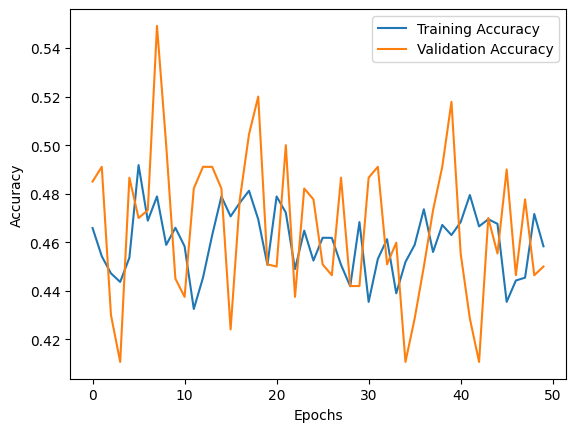

In [35]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()


In [36]:
model.save("potato_disease_model.h5")  # Save the model in HDF5 format

In [37]:
model.evaluate(test_data)

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 182ms/step - accuracy: 0.4694 - loss: 0.9361


[0.9173527956008911, 0.4241071343421936]

first image to predict
actual label: Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step
predicted label: Potato___Late_blight
first image to predict
actual label: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
predicted label: Potato___Late_blight


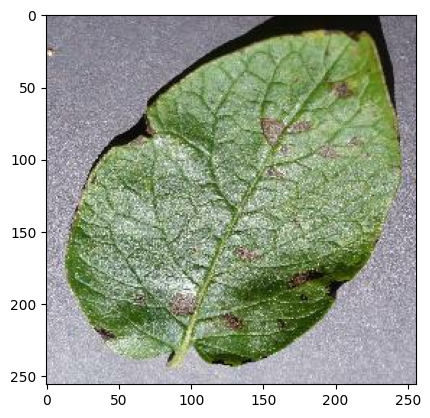

In [38]:
import numpy as np
for images_batch, labels_batch in test_data.take(2):
    
    first_image = images_batch[0].numpy()
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",classes[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",classes[np.argmax(batch_prediction[0])])

In [39]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = classes[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


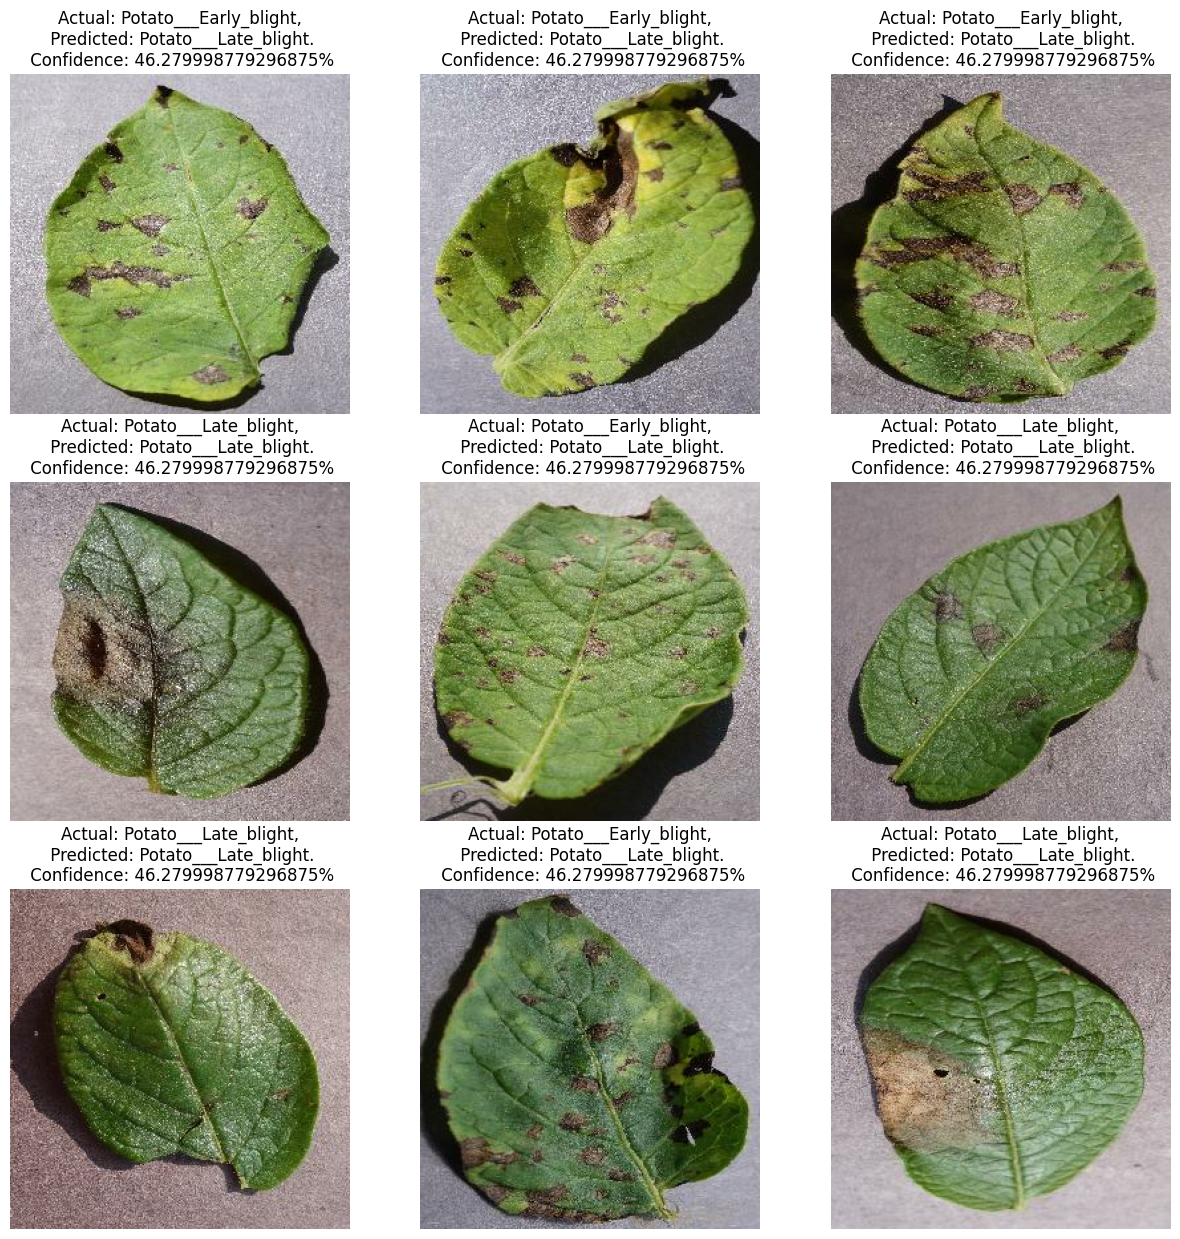

In [40]:
plt.figure(figsize=(15, 15))
for images, labels in test_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy())
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = classes[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")